# Advertising Campaign Expenditure

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../datasets/advertising_and_sales_clean.csv')

In [3]:
df.head(3)

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83


In [4]:
# We will use advertising expediture as feature to predict sales values.

### Relation between money invested in Radio -> Sales

#### Selection of the feature and target

In [5]:
features = df['radio'].values.reshape(-1, 1)

In [6]:
target = df['sales'].values

In [7]:
model = LinearRegression()

#### Training of the model

In [8]:
model.fit(features, target)

LinearRegression()

#### Doing the predictions with the data

In [9]:
predictions = model.predict(features)

In [10]:
predictions

array([ 95491.17119147, 117829.51038393, 173423.38071499, ...,
       206147.61403088, 187204.93183873, 174094.31771993])

#### Checking the real values vs predicted

In [11]:
df_compare = pd.DataFrame(list(zip(target, predictions)), 
                  columns =['real', 'predicted'])
df_compare['error'] = df_compare['real'] - df_compare['predicted']
df_compare.head(5)

,real,predicted,error
0,54732.76,95491.171191,-40758.411191
1,46677.90,117829.510384,-71151.610384
2,150177.83,173423.380715,-23245.550715
3,298246.34,291603.114442,6643.225558
4,56594.18,111137.281671,-54543.101671


#### Show the relation in a graph

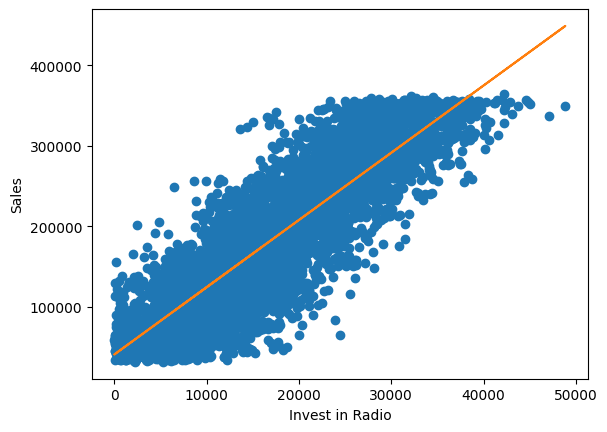

In [12]:
plt.scatter(features, target)
plt.xlabel("Invest in Radio")
plt.ylabel("Sales")

plt.plot(features, predictions, 'C1')


# multiple linear regression
If you use more than 1 variable as feature then its a multiple linear regression model

### Selection of all the features that is going to be taken into account

In [13]:
# In this case we are going to take all the variables to predict
features_columns = ['tv', 'radio', 'social_media', 'influencer']
features = df[features_columns].values

In [14]:
df[features_columns].head(3)

,tv,radio,social_media,influencer
0,16000.0,6566.23,2907.98,Mega
1,13000.0,9237.76,2409.57,Mega
2,41000.0,15886.45,2913.41,Mega


In [15]:
# As the column "influencer" is a string, the model cannot train with that so we have to convert this column 
# to a numerical column. We have 2 options here: 
# 1. LabelEncoder: turn your string into incremental value
# 2. OneHotEncoder: use One-of-K algorithm to transform your String into integer

# This time we will the first option, the LabelEncoder

### LabelEncoder for the column "influencer"

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df['influencer_encoded'] = le.fit_transform(df.influencer)
df[['tv', 'radio', 'social_media', 'influencer_encoded']].head()

,tv,radio,social_media,influencer_encoded
0,16000.0,6566.23,2907.98,1
1,13000.0,9237.76,2409.57,1
2,41000.0,15886.45,2913.41,1
3,83000.0,30020.03,6922.30,1
4,15000.0,8437.41,1406.00,2


In [19]:
features_columns = ['tv', 'radio', 'social_media', 'influencer_encoded']
features = df[features_columns].values

In [20]:
# Selection of the target variable
target_column = ['sales']
target = df[target_column].values

In [21]:
# this allow us to split the data into train and test
from sklearn.model_selection import train_test_split

### Split the train and test set

In [22]:
feature_train, feature_test, target_train, target_test = \
    train_test_split(features, target, test_size=0.25, random_state=1)

In [23]:
feature_test.shape

(1137, 4)

### Creation of the linear regression model

model = LinearRegression()

In [24]:
model.fit(feature_train, target_train)

LinearRegression()

In [25]:
print(feature_train.shape)
print(target_train.shape)

(3409, 4)
(3409, 1)


In [26]:
predictions = model.predict(feature_test)

In [27]:
print(predictions[:5])
print(target_test[:5])

[[331213.05310478]
 [ 96025.65117212]
 [352432.15362114]
 [213627.56957727]
 [124389.27895201]]
[[329147.81]
 [100145.86]
 [352688.66]
 [213482.65]
 [128471.73]]


### Assessing model performance

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
r2 = model.score(feature_train, target_train)
print("R Squared: " + str(r2))

rmse = mean_squared_error(target_test, predictions, squared=False)
print("Root Mean Squared Error: " + str(rmse))


R Squared: 0.9990024926775555
Root Mean Squared Error: 2981.173528095104


### Cross Validation 

In [34]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

In [36]:
# shuffle: shuffle the data before splitting into folds
# random_state: to be able to reproduce the same folds later
kfolds = KFold(n_splits=4, shuffle=True, random_state=1)

model = LinearRegression()

results_after_cross_validation = cross_val_score(model, features, target, cv=kfolds)

print("Results using cross validation")
print(results_after_cross_validation)

print("Media of the results {}".format(np.mean(results_after_cross_validation)))
print("Median of the results {}".format(np.median(results_after_cross_validation)))

Results using cross validation
[0.9989716  0.99896178 0.99902194 0.9990142 ]
Media of the results 0.998992380754542
Median of the results 0.9989928996853797
